**Global AI Deep Learning Project**

This notebook file has been prepared as a project assignment within the scope of the Global AI Deep learning course. Within the scope of the project, it is aimed to classify some street sounds. 

The whole project was prepared in two stages as preprocessing and modeling stages. This file contains only the preprocessing steps of the spectrum images.

**Team:**

*   Mehmet Aziz ÇAKMAK
*   Tolga EKEN
*   Sevda KINAY
*   Cavit İbrahim GÖKDOĞAN
*   Vesile Nur ERKAN

**Data:** 

UrbanSounds8K Dataset

Spectrograms: https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog?usp=sharing


**Model:**
CNN Classification Model

**File**
Phase 1: Preprocessing Phase

**1. UrbanSounds8K Dataset : Quick look at the dataset ✅**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('UrbanSound8K/urban_sound_summary')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [ ]:
sound_classes = data['class'].value_counts()
sound_classes = pd.DataFrame(sound_classes)
sound_classes

,class
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429
gun_shot,374


In [ ]:
sound_classes_id = data['classID'].value_counts()
sound_classes_id = pd.DataFrame(sound_classes_id)
sound_classes_id

,classID
3,1000
2,1000
0,1000
9,1000
5,1000
7,1000
4,1000
8,929
1,429
6,374


In [ ]:
# Here is sound class name, class id and classes count value are gethering in one table
sound_classes['Class_id'] = sound_classes_id.index
sound_classes

,class,Class_id
dog_bark,1000,3
children_playing,1000,2
air_conditioner,1000,0
street_music,1000,9
engine_idling,1000,5
jackhammer,1000,7
drilling,1000,4
siren,929,8
car_horn,429,1
gun_shot,374,6


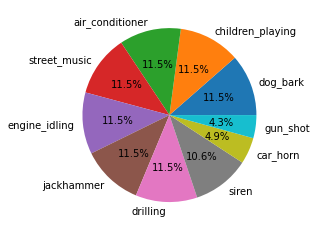

In [ ]:
# Distrubition of sound classes with pie chart
plt.pie(sound_classes['class'], labels=sound_classes.index, autopct='%1.1f%%')
plt.show()

**2. Input wav files and make spectrums**

Waveform Audio File Format (WAVE or WAV due to its filename extension; pronounced "wave") is an audio file format standard, developed by IBM and Microsoft, for storing an audio bitstream on PCs. It is the main format used on Microsoft Windows systems for uncompressed audio. The usual bitstream encoding is the linear pulse-code modulation (LPCM) format. (Wikipedia.org, 2022)

Though a WAV file can contain compressed audio, the most common WAV audio format is uncompressed audio in the linear pulse-code modulation (LPCM) format. LPCM is also the standard audio coding format for audio CDs, which store two-channel LPCM audio sampled at 44,100 Hz with 16 bits per sample. Since LPCM is uncompressed and retains all of the samples of an audio track, professional users or audio experts may use the WAV format with LPCM audio for maximum audio quality. WAV files can also be edited and manipulated with relative ease using software (Wikipedia.org, 2022).

librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems (Librosa.org, 2022).


In [ ]:
import os
import librosa, librosa.display

In [ ]:
FILE_PATH = "UrbanSound8K/audio/"
FOLDERS = [x for x in os.listdir(FILE_PATH)]
FOLDERS

['.DS_Store',
 'fold1',
 'fold10',
 'fold2',
 'fold3',
 'fold4',
 'fold5',
 'fold6',
 'fold7',
 'fold8',
 'fold9']

In [ ]:
#Get a sample of wav file, location is folder1, 10. wav file
WAV_FILE_PATH = os.listdir(f'{FILE_PATH}/{FOLDERS[1]}')
wav_file_sample = WAV_FILE_PATH[11]
file_path = f'{FILE_PATH}{FOLDERS[1]}/{WAV_FILE_PATH[11]}'

wav_class = wav_file_sample.split('-')

print(f'Wav Sample Name: {wav_file_sample}\nFile Path: {file_path}\nWav Class: {wav_class[1]}')


Wav Sample Name: 103074-7-0-1.wav
File Path: UrbanSound8K/audio/fold1/103074-7-0-1.wav
Wav Class: 7


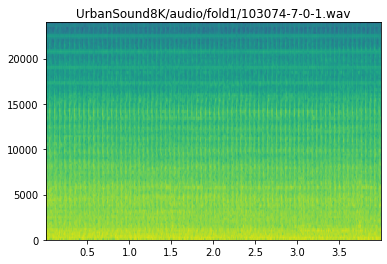

<Figure size 720x432 with 0 Axes>

In [ ]:
# Create a spectrogram from wav file
import numpy as np
import pylab

def create_wav_spec(file):
    (sig, rate) = librosa.load(file, sr=None, mono=True, dtype=np.float32)
    wav_spec = pylab.specgram(sig, Fs=rate)
    pylab.title(file)
    pylab.figure(figsize=(10, 6))
    pylab.savefig('wav_spec.jpg')
    plt.close()
    

create_wav_spec(file_path)

